# *Práctica* limpieza de Datos

## Introducción

La página https://www.sharkattackfile.net/ lleva un control de los accidentes que se producen por
ataques de tiburones, de la misma se puede bajar el log de incidentes que tiene los siguientes datos:

- Case # ID del ataque
- Date Fecha en que ocurrió el ataque
- Country País en donde ocurrió el ataque
- Area Provincia/Estado/Zona donde ocurrió el ataque
- Location Ciudad/localidad más cercana
- Activity Actividad que estaba haciendo la víctima
- Name Nombre de la víctima
- Sex Sexo de la víctima
- Age Edad de la víctima
- Injury Tipo de daños que sufrió la víctima
- Time Momento del día en el que ocurrió el ataque
- Species Especie de tiburón involucrada
- Investigator or Source
Investigador que reportó el ataque o fuente de donde se conocen los datos
del ataque

Aclaraciones
Todos los individuos sobrevivieron a menos que esté aclarado que el ataque fue fatal en el campo

Injury.
Código de colores (los colores indican el tipo de incidente)
- Unprovoked Incidents = Tan
- Provoked Incidents = Orange
- Attacks on Boats = Green
- Air / Sea Disasters = Yellow
- Questionable Incidents = Blue

Otra información

- Unprovoked vs. Provoked - GSAF defines a provoked incident as one in which the shark was
speared, hooked, captured or in which a human drew "first blood". Although such incidents are of
little interest to shark behaviorists, when the species of shark involved is known and pre-op photos of
the wounds are available, the bite patterns are of value in determining species of shark involved in
other cases when the species could not identified by the patient or witnesses. We know that a live
human is rarely perceived as prey by a shark. Many incidents are motivated by curiosity, others may
result when a shark perceives a human as a threat or competitor for a food source, and could be
classed as "provoked" when examined from the shark's perspective.

- Attacks on Boats – Incidents in which a boat was bitten or rammed by a shark are in green.

However, in cases in which the shark was hooked, netted or gaffed, the entry is orange because they
are classed as provoked incidents.

- Casualties of War & Air/Sea Disasters - Sharks maintain the health of the marine ecosystem by
removing the dead or injured animals. Many incidents result because, like other animals that don't rely
on instinct alone, sharks explore their environment. Lacking hands, they may investigate an
unfamiliar object with their mouths. Unlike humans, there is no malice in sharks; they simply do what
nature designed them to do.

- Air/Sea Disasters are accidents that place people into the day-to-day
business of sharks. The wartime losses due to sharks result from mans' cruelty to man. Air/Sea Disasters are in yellow.

- Questionable incidents - Incidents in which there are insufficient data to determine if the injury was
caused by a shark or the person drowned and the body was later scavenged by sharks. In a few cases,
despite media reports to the contrary, evidence indicated there was no shark involvement whatsoever.
Such incidents are in blue.

---


A partir de la información provista se necesita conocer:

a) La cantidad de incidentes de cada tipo

b) La cantidad de incidentes de cada tipo por país

Es necesario entregar la base que se utilizó para efectuar los cálculos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
xl = pd.ExcelFile("GSAF5.xlsx")

In [3]:
xl.sheet_names

['Sheet1-GSAF']

In [4]:
df = xl.parse("Sheet1-GSAF")

In [5]:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Unnamed: 11', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

Quitemos las columnas que no tienen datos que nos interesen para los problemas a resolver:
 - Sex , Age, Case number, Case Number.1, original order, Unnamed: 21, Unnamed: 22, href formula, href, Unnamed: 11, Time, Species, Name, Source, Activity, pdf

In [6]:
columns_to_drop = ["Activity","Name","Sex","Age", "Unnamed: 11", "Time","Species ",
                   "Source", "pdf" ,"href formula","href", "Case Number",
                   "Case Number.1","original order", "Unnamed: 21","Unnamed: 22"
                   ]
df = df.drop(columns = columns_to_drop)
df

,Date,Year,Type,Country,State,Location,Injury
0,10 Nov-2023,2023.0,Unprovoked,AUSTRALIA,South Australia,Port Noarlunga,Injuries to scalp and face
1,03 Nov-2023,2023.0,Unprovoked,AUSTRALIA,Westerm Australia,Peak Island,Minor injury
2,02 Nov-2023,2023.0,Unprovoked,NEW ZEALAND,North Island,Cape Pallister,Minor injury. Wetsuit shredded
3,31 Oct-2023,2023.0,Unprovoked,AUSTRALIA,South Australia,Streaky Bay,FATAL
4,25 Oct 2023,2023.0,Unprovoked,USA,Hawaii,"Pua’ena Point, Haleiwa, Oahu",Bite to right thigh
...,...,...,...,...,...,...,...
6934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6937,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Veamos cuantos celdas sin datos tenemos:

In [7]:
df.isnull().sum()

Date         25
Year         27
Type         43
Country      75
State       506
Location    589
Injury       60
dtype: int64

Ahora revisemos que columnas tienen datos desconocidos en la columna "Type".

In [8]:
print(f'Hay {df[df["Type"].isnull()].shape[0]} filas con la propiedad Type vacia')
df[df['Type'].isnull()]

Hay 43 filas con la propiedad Type vacia


,Date,Year,Type,Country,State,Location,Injury
163,01-Apr-2022,2022.0,NaN,SOUTH AFRICA,KZN,LaLucia,Possible drowing and scavenging
179,08-Feb-2022,2022.0,NaN,COSTA RICA,Guanacoste,Playa Del Coco,Right forearm and left hand injured
200,16-Oct-2021,2021.0,NaN,AUSTRALIA,Queensland,Sudbury Island,Disappeared
205,10-Sep-2021,2021.0,NaN,EGYPT,NaN,Sidi Abdel Rahmen,Laceration to arm caused by metal object
226,21-Jul-2021,2021.0,NaN,USA,Florida,"Near Patrick AFB, Brevard County","Small laceration to ankle, shark involvement n..."
314,21-Oct-2020,2020.0,NaN,USA,North Carolina,"Emerald Isle, Carteret County",Laceration to knee and foot
319,21-Sep-2020,2020.0,NaN,USA,Hawaii,"Charley Young Beach, Maui",Lacerations and puncture wounds to shoulder
323,16-Sep-2020,2020.0,NaN,USA,Florida,"Daytona Beach Shores, Volusia County",Minor cuts and punctures to left foot
326,08-Sep-2020,2020.0,NaN,USA,Florida,Canaveral National Seashore,Hand bitten that was holding a fish PROVOKED I...
336,19-Aug-2020,2020.0,NaN,USA,South Carolina,"Myrtle Beach, Horry County",Minor injury to arm by a fish


Como se vio anteriormente a partir de la fila 6911 no tenemos datos, por lo tanto quitemos las filas a partir de la 6911 ya que no tienen datos relevantes.

In [9]:
df = df.drop(index = range(6911,len(df)))
df

,Date,Year,Type,Country,State,Location,Injury
0,10 Nov-2023,2023.0,Unprovoked,AUSTRALIA,South Australia,Port Noarlunga,Injuries to scalp and face
1,03 Nov-2023,2023.0,Unprovoked,AUSTRALIA,Westerm Australia,Peak Island,Minor injury
2,02 Nov-2023,2023.0,Unprovoked,NEW ZEALAND,North Island,Cape Pallister,Minor injury. Wetsuit shredded
3,31 Oct-2023,2023.0,Unprovoked,AUSTRALIA,South Australia,Streaky Bay,FATAL
4,25 Oct 2023,2023.0,Unprovoked,USA,Hawaii,"Pua’ena Point, Haleiwa, Oahu",Bite to right thigh
...,...,...,...,...,...,...,...
6906,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,FATAL
6907,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,FATAL
6908,Before 1906,0.0,Unprovoked,AUSTRALIA,New South Wales,,FATAL
6909,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,FATAL


# Punto 1

Utilicemos la libreria openpyxl para dar valor a los colores que tiene la tabla, ya que muchos de los valores nulos en "type" tienen color, que como dice en la explicacion de la tabla tiene significado.

In [10]:
import openpyxl
wb = openpyxl.load_workbook('GSAF5.xlsx',data_only=True)

In [11]:
fs = wb.active
fs_count_row = 6912
fs_count_col = 1
colors = []
colors_name = []
for row in range(2,fs_count_row+1):
    for column in range(1,fs_count_col+1):
        cell_color = fs.cell(column=column, row=row)
        fgColor = cell_color.fill.fgColor.index
        if (fgColor=='00000000'):
            continue
        else:
          colors.append(fgColor)

In [12]:
# color_count = collections.Counter(colors)
# print(color_count)

Traduzcamos los codigos de colores a strings:

In [73]:
colors_name = []
for color in colors:
    if(color == 47):
        colors_name.append("tan")
    elif(color == 8):
        colors_name.append("orange")
    elif(color == 44):
        colors_name.append("blue")
    elif(color == 42):
        colors_name.append("green")
    elif(color == 43):
        colors_name.append("yellow")
    elif(color == 53):
        colors_name.append("orange")
print(colors_name)

['tan', 'tan', 'tan', 'tan', 'tan', 'orange', 'green', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'green', 'tan', 'tan', 'tan', 'tan', 'green', 'blue', 'tan', 'orange', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'green', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'blue', 'tan', 'orange', 'tan', 'tan', 'tan', 'tan', 'orange', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'green', 'tan', 'tan', 'tan', 'tan', 'blue', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'blue', 'blue', 'tan', 'tan', 'tan', 'tan', 'tan', 'orange', 'orange', 'orange', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'orange', 'tan', 'yellow', 'tan', 'orange', 'tan', 'tan', 'orange', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'blue', 'tan', 'orange', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 'tan', 't

Ahora agreguemos los datos sobre colores encontrados al dataframe:

In [75]:
 colors_series = pd.Series(colors,name ="color")

if("color" not in df.columns):
    df = pd.concat([df,colors_series], axis = 1)

In [76]:
colors_name_series = pd.Series(colors_name, name = "color_name")

if("color_name" not in df.columns):
  df = pd.concat([df,colors_name_series], axis = 1)

In [77]:
colors_name_count = collections.Counter(colors_name)
print(colors_name_count)

Counter({'tan': 5091, 'orange': 632, 'blue': 582, 'green': 362, 'yellow': 244})


Veamos como nos quedo el dataframe con los colores agregados:

In [78]:
df

,Date,Year,Type,Country,State,Location,Injury,color_name,color
0,10 Nov-2023,2023.0,Unprovoked,AUSTRALIA,South Australia,Port Noarlunga,Injuries to scalp and face,tan,47
1,03 Nov-2023,2023.0,Unprovoked,AUSTRALIA,Westerm Australia,Peak Island,Minor injury,tan,47
2,02 Nov-2023,2023.0,Unprovoked,NEW ZEALAND,North Island,Cape Pallister,Minor injury. Wetsuit shredded,tan,47
3,31 Oct-2023,2023.0,Unprovoked,AUSTRALIA,South Australia,Streaky Bay,FATAL,tan,47
4,25 Oct 2023,2023.0,Unprovoked,USA,Hawaii,"Pua’ena Point, Haleiwa, Oahu",Bite to right thigh,tan,47
...,...,...,...,...,...,...,...,...,...
6906,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,FATAL,tan,47
6907,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,FATAL,tan,47
6908,Before 1906,0.0,Unprovoked,AUSTRALIA,New South Wales,,FATAL,tan,47
6909,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,FATAL,tan,47


In [18]:
# df.groupby("Type").size().sort_values()

Ahora veamos si el Type de los datos respeta los colores:



In [19]:
unique_pairs = df.groupby(['Type', 'color_name']).size().reset_index(name='count')
print(unique_pairs)

                   Type color_name  count
0                     ?        tan      1
1                  Boat      green      7
2               Invalid       blue    548
3               Invalid        tan      4
4              Provoked     orange    629
5              Provoked        tan      4
6          Questionable       blue     17
7          Questionable        tan      2
8          Sea Disaster       blue      2
9          Sea Disaster      green      1
10         Sea Disaster     yellow    239
11          Unconfirmed       blue      1
12  Under investigation        tan      1
13           Unprovoked       blue      3
14           Unprovoked      green      1
15           Unprovoked     orange      2
16           Unprovoked        tan   5072
17           Unprovoked     yellow      3
18           Unverified       blue      1
19           Watercraft      green    353
20           Watercraft        tan      1
21           Watercraft     yellow      1


Se puede ver que hay varios pares que hay que analizar particularmente.

In [20]:
df.loc[(df["Type"] == "?") & (df["color_name"] == "tan")]

,Date,Year,Type,Country,State,Location,Injury,color_name
173,21-Feb-2022,2022.0,?,BAHAMAS,Grand Bahama Island,Tiger Beach,Arm bitten,tan


Despues de analizar varios casos particulares, decidimos que es mejor tener en cuenta los colores como tipos para los incidentes, ya que la columna "type" tiene varios faltantes ademas de datos que no son congruentes con los articulos que acompañan a cada incidente.

Grafiquemos la cantidad de Incidentes por color que tenemos.

In [21]:
df_counts = df["color_name"].value_counts()

ax = df_counts.plot.bar(stacked=False,fontsize = 8)


ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# set the title and axis labels
ax.set_title('Number of Accidents by Type')
ax.set_ylabel('Number of Accidents')
ax.set_xlabel('Type')
ax.bar_label(ax.bar(df_counts.index,df_counts.values), fmt='%.0f', rotation='vertical',padding=2, fontsize=8)
ax.yaxis.set_ticks(np.arange(0, 6000, 1000))

plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

# Punto 2

Primero veamos cuantos elementos tenemos con la propiedad Country vacia:

In [22]:
null_countries = df.Country.isnull().sum()
print(f"Hay {null_countries} filas sin dato de pais")

Hay 50 filas sin dato de pais


Completemos los datos faltantes con "deconocido" asi los podemos analizar:

In [23]:
df['Country'] = df['Country'].fillna('Unknown')

Ahora veamos cuantos paises unicos tenemos:

In [24]:
df.Country.nunique()

224

Claramente son demasiados paises, por lo tanto debe haber problemas con algunos de los nombres. Veamos que nombres aparecen:

In [25]:
unique_countries = df.Country.unique()
print(unique_countries)

['AUSTRALIA' 'NEW ZEALAND' 'USA' 'Mexico' 'BELIZE' 'EGYPT' 'PHILIPPINES'
 'Coral Sea' 'BAHAMAS' 'SPAIN' 'PORTUGAL' 'COLOMBIA' 'SOUTH AFRICA'
 'ECUADOR' 'FRENCH POLYNESIA' 'NEW CALEDONIA' 'TURKS and CaICOS' 'MEXICO'
 'BRAZIL' 'SEYCHELLES' 'ARGENTINA' 'FIJI' 'MeXICO' 'Maldives'
 'South Africa' 'ENGLAND' 'JAPAN' 'INDONESIA' 'JAMAICA' 'MALDIVES'
 'THAILAND' 'COLUMBIA' 'COSTA RICA' 'New Zealand'
 'British Overseas Territory' 'CANADA' 'JORDAN' 'ST KITTS / NEVIS'
 'ST MARTIN' 'PAPUA NEW GUINEA' 'REUNION ISLAND' 'ISRAEL' 'CHINA' 'SAMOA'
 'IRELAND' 'ITALY' 'MALAYSIA' 'LIBYA' 'Unknown' 'CUBA' 'MAURITIUS'
 'SOLOMON ISLANDS' 'ST HELENA, British overseas territory' 'COMOROS'
 'REUNION' 'UNITED KINGDOM' 'UNITED ARAB EMIRATES' 'CAPE VERDE' 'Fiji'
 'DOMINICAN REPUBLIC' 'CAYMAN ISLANDS' 'ARUBA' 'MOZAMBIQUE' 'PUERTO RICO'
 'ATLANTIC OCEAN' 'GREECE' 'ST. MARTIN' 'FRANCE' 'TRINIDAD & TOBAGO'
 'KIRIBATI' 'DIEGO GARCIA' 'TAIWAN' 'PALESTINIAN TERRITORIES' 'GUAM'
 'NIGERIA' 'TONGA' 'SCOTLAND' 'CROATIA' 'SAUDI

Ordenemoslos para que sea mas facil ver nombres repetidos y errores:

In [26]:
unique_countries_str = [str(x) for x in unique_countries]
sorted(unique_countries_str)

[' PHILIPPINES',
 ' TONGA',
 'ADMIRALTY ISLANDS',
 'AFRICA',
 'ALGERIA',
 'AMERICAN SAMOA',
 'ANDAMAN / NICOBAR ISLANDAS',
 'ANDAMAN ISLANDS',
 'ANGOLA',
 'ANTIGUA',
 'ARGENTINA',
 'ARUBA',
 'ASIA?',
 'ATLANTIC OCEAN',
 'AUSTRALIA',
 'AZORES',
 'BAHAMAS',
 'BAHREIN',
 'BANGLADESH',
 'BARBADOS',
 'BAY OF BENGAL',
 'BELIZE',
 'BERMUDA',
 'BRAZIL',
 'BRITISH ISLES',
 'BRITISH NEW GUINEA',
 'BRITISH VIRGIN ISLANDS',
 'BRITISH WEST INDIES',
 'BURMA',
 'Between PORTUGAL & INDIA',
 'British Overseas Territory',
 'CANADA',
 'CAPE VERDE',
 'CARIBBEAN SEA',
 'CAYMAN ISLANDS',
 'CENTRAL PACIFIC',
 'CEYLON',
 'CHILE',
 'CHINA',
 'COLOMBIA',
 'COLUMBIA',
 'COMOROS',
 'COOK ISLANDS',
 'COSTA RICA',
 'CRETE',
 'CROATIA',
 'CUBA',
 'CURACAO',
 'CYPRUS',
 'Coast of AFRICA',
 'Coral Sea',
 'DIEGO GARCIA',
 'DJIBOUTI',
 'DOMINICAN REPUBLIC',
 'ECUADOR',
 'EGYPT',
 'EGYPT ',
 'EGYPT / ISRAEL',
 'EL SALVADOR',
 'ENGLAND',
 'EQUATORIAL GUINEA / CAMEROON',
 'FALKLAND ISLANDS',
 'FEDERATED STATES OF MICRONESI

Se pueden ver que hay varios nombres que en lo unico que varian es que mezclan minusculas y mayusculas o tienen espacios donde no deberian. Limpiemos la columna de estos defectos:

In [27]:
df['Country'] = df['Country'].str.upper()
df['Country'] = df['Country'].map(lambda p : p.strip())

Veamos cuantos nombres unicos tenemos ahora:

In [28]:
print(df.Country.nunique())

unique_countries = df.Country.unique()
# print(sorted(unique_countries))

208


A pesar de que disminuyo la cantidad siguen siendo muchos, veamos casos particulares y sigamos disminuyendo la cantidad de nombres:

In [29]:
df.Country.value_counts().to_frame()

,Country
USA,2533
AUSTRALIA,1472
SOUTH AFRICA,597
NEW ZEALAND,144
PAPUA NEW GUINEA,136
...,...
BRITISH WEST INDIES,1
ALGERIA,1
NORTHERN ARABIAN SEA,1
TUVALU,1


Se pueden ver facilmente que varios paises tienen mal escritos sus nombres, por ejemplo colombia que aparece como colombia y columbia o ceylon que aparece de varias formas diferentes. Juntemos todos estos nombres con el que corresponda:

In [30]:
# Cambiamos columbia por colombia
df.loc[df['Country'] == 'COLUMBIA',['Country']] = 'COLOMBIA'

In [31]:
# CEYLON
df.loc[df['Country'] == 'CEYLON (SRI LANKA)',['Country']] = 'CEYLON'
df.loc[df['Country'] == 'SRI LANKA',['Country']] = 'CEYLON'

In [32]:
# UNITED ARAB EMIRATES (UAE) a UNITED ARAB EMIRATES
df.loc[df['Country'] == 'UNITED ARAB EMIRATES (UAE)',['Country']] = 'UNITED ARAB EMIRATES'

In [33]:
#TOBAGO a TRINIDAD Y TOBAGO
df.loc[df['Country'] == 'TOBAGO',['Country']] = 'TRINIDAD & TOBAGO'

In [34]:
#NEVIS y ST KITTS / NEVIS A SAINT KITTS AND NEVIS
df.loc[df['Country'] == 'NEVIS',['Country']] = 'SAINT KITTS AND NEVIS'
df.loc[df['Country'] == 'ST KITTS / NEVIS',['Country']] = 'SAINT KITTS AND NEVIS'

In [35]:
#GRAND CAYMAN a CAYMAN ISLANDS
df.loc[df['Country'] == 'GRAND CAYMAN',['Country']] = 'CAYMAN ISLANDS'

In [36]:
#NEW BRITAIN y ADMITALTY ISLANDS a PAPUA NEW GUINEA
df.loc[df['Country'] == 'NEW BRITAIN',['Country']] = 'PAPUA NEW GUINEA'
df.loc[df['Country'] == 'ADMIRALTY ISLANDS',['Country']] = 'PAPUA NEW GUINEA'

In [37]:
#ANTIGUA a ANTIGUA AND BARBUDA
df.loc[df['Country'] == 'ANTIGUA',['Country']] = 'ANTIGUA AND BARBUDA'

In [38]:
#AZORES a PORTUGAL
df.loc[df['Country'] == 'AZORES',['Country']] = 'PORTUGAL'

In [39]:
#BRITISH ISLES a UNITED KINGDOM
df.loc[df['Country'] == 'BRITISH ISLES',['Country']] = 'UNITED KINGDOM'

In [40]:
#OKINAWA A JAPON
df.loc[df['Country'] == 'OKINAWA',['Country']] = 'JAPAN'

In [41]:
#CRETE A GREECE
df.loc[df['Country'] == 'CRETE',['Country']] = 'GREECE'

In [42]:
#westerm samoa a samoa
df.loc[df['Country'] == 'WESTERN SAMOA',['Country']] = 'SAMOA'

In [43]:
#ST. MAARTIN y ST MARTIN a ST. MARTIN
df.loc[df['Country'] == 'ST. MAARTIN',['Country']] = 'ST. MARTIN'
df.loc[df['Country'] == 'ST MARTIN',['Country']] = 'ST. MARTIN'

In [44]:
#JAVA a INDONESIA
df.loc[df['Country'] == 'JAVA',['Country']] = 'INDONESIA'

In [45]:
#KOREA to SOUTH KOREA
df.loc[df['Country'] == 'KOREA',['Country']] = 'SOUTH KOREA'

In [46]:
#MALDIVE ISLANDS a MALDIVES
df.loc[df['Country'] == 'MALDIVE ISLANDS',['Country']] = 'MALDIVES'

In [47]:
#ROATAN A HONDURAS
df.loc[df['Country'] == 'ROATAN',['Country']] = 'HONDURAS'

In [48]:
#THE BALKANS a SLOVENIA
df.loc[df['Country'] == 'THE BALKANS',['Country']] = 'SLOVENIA'

In [49]:
# EQUATORIAL GUINEA / CAMEROON to EQUATORIAL GUINEA
df.loc[df['Country'] == 'EQUATORIAL GUINEA / CAMEROON',['Country']] = 'EQUATORIAL GUINEA'

In [50]:
# andaman islands y nicobar islands y NICOBAR ISLANDAS a INDIA,
df.loc[df['Country'] == 'ANDAMAN / NICOBAR ISLANDAS',['Country']] = 'INDIA'
df.loc[df['Country'] == 'ANDAMAN ISLANDS',['Country']] = 'INDIA'

In [51]:
# TURKS and CaICOS, BRITISH OVERSEAS TERRITORY y BRITISH WEST INDIES a TURKS AND CAICOS ISLANDS
df.loc[df['Country'] == 'TURKS and CaICOS',['Country']] = 'TURKS AND CAICOS ISLANDS'
df.loc[df['Country'] == 'BRITISH OVERSEAS TERRITORY',['Country']] = 'TURKS AND CAICOS ISLANDS'
df.loc[df['Country'] == 'BRITISH WEST INDIES',['Country']] = 'TURKS AND CAICOS ISLANDS'
df.loc[df['Country'] == 'TURKS & CAICOS',['Country']] = 'TURKS AND CAICOS ISLANDS'

In [52]:
#Dudas
# american samoa a USA,
# bermuda, CAYMAN ISLANDS, ST HELENA y BRITISH VIRGIN ISLANDS a UNITED KINGDOM (British overseas territory) ,
# TURKS AND CAICOS ISLANDS to UNITED KINGDOM(British overseas territory),
# GREENLAND a DENMARK(Territorio),
# GUAM a USA(territorio),
# martinique, mayotte y NEW CALEDONIA a FRANCE(french territory)
# REUNION y REUNION ISLAND a FRANCE(Overseas Department of France)
# ENGLAND, SCOTLAND a UNITED KINGDOM

In [53]:
print(df.Country.nunique())

184


In [54]:
df.groupby("Country").size().sort_values()

Country
AFRICA                 1
GREENLAND              1
RED SEA?               1
GHANA                  1
GEORGIA                1
                    ... 
PAPUA NEW GUINEA     143
NEW ZEALAND          144
SOUTH AFRICA         597
AUSTRALIA           1472
USA                 2533
Length: 184, dtype: int64

# VER QUE HACER CON ESTOS:

- AFRICA 1
- PACIFIC OCEAN 17
- SOUTH ATLANTIC OCEAN  12
- NEW GUINEA    10
- NORTH PACIFIC OCEAN   7
- INDIAN OCEAN  7
- MID ATLANTIC OCEAN    5
- PERSIAN GULF  4
- NORTH ATLANTIC OCEAN  4
- AMERICAN SAMOA    3
- JOHNSTON ISLAND   2
- SOUTH PACIFIC OCEAN   2
- CENTRAL PACIFIC   2
- MEDITERRANEAN SEA 2
- SOUTHWEST PACIFIC OCEAN   2
- ST HELENA, British overseas territory 2
- PACIFIC OCEAN     2
- WEST INDIES   2
- ANDAMAN / NICOBAR ISLANDAS    1
- SOLOMON ISLANDS / VANUATU 1
- RED SEA   1
- ITALY / CROATIA   1
- BAY OF BENGAL 1
- Coral Sea 1
- PALESTINIAN TERRITORIES   1
- DIEGO GARCIA  1
- RED SEA?  1
- Between PORTUGAL & INDIA  1
- SOUTH CHINA SEA   1
- MID-PACIFC OCEAN  1
- SUDAN?    1
- NETHERLANDS ANTILLES  1
- EGYPT / ISRAEL    1
- FALKLAND ISLANDS  1
- ASIA? 1
- RED SEA / INDIAN OCEAN    1
- NORTH ATLANTIC OCEAN  1
- SAN DOMINGO   1
- TASMAN SEA    1
- ANDAMAN ISLANDS   1
- Coast of AFRICA   1
- GULF OF ADEN  1
- NORTHERN ARABIAN SEA  1
- INDIAN OCEAN? 1
- NORTHERN MARIANA ISLANDS  1
- IRAN / IRAQ   1
- OCEAN 1
- BRITISH NEW GUINEA    1
- NORTH SEA 1

Completamos datos descoocidos con otros datos de la fila:

In [55]:
df[df["Country"] == "UNKNOWN"]

,Date,Year,Type,Country,State,Location,Injury,color_name
644,Reported 13-Nov-2017,2017.0,Unprovoked,UNKNOWN,NaN,NaN,Puncture wounds to feet,tan
1110,Aug-2014,2014.0,Invalid,UNKNOWN,NaN,NaN,Shark involvement prior to death not confirmed,blue
3546,Ca. 1983,1983.0,Unprovoked,UNKNOWN,English Channel,NaN,Left leg bitten,tan
3976,Nov-1970,1970.0,Unprovoked,UNKNOWN,NaN,NaN,Extensive injuries,tan
3985,02-Aug-1970,1970.0,Invalid,UNKNOWN,Caribbean Sea,Between St. Kitts & Nevis,"Sharks scavenged on bodies, but no record of t...",blue
3986,5-Jul-1970,1970.0,Unprovoked,UNKNOWN,NaN,NaN,Finger or toe severed,tan
3993,Apr-1970,1970.0,Provoked,UNKNOWN,NaN,NaN,Arm abraded & lacerated. Recorded as PROVOKED ...,orange
3997,5-Feb-1970,1970.0,Unprovoked,UNKNOWN,NaN,NaN,Lacerations to lower leg,tan
4023,Aug-1969,1969.0,Unprovoked,UNKNOWN,NaN,NaN,Am lacerated,tan
4203,21-Oct-1965,1965.0,Unprovoked,UNKNOWN,NaN,Florida Strait,Survived,tan


In [56]:
df.loc[df['State'] == 'Gulf of California',['Country']] = 'MEXICO'

In [57]:
df.loc[df['Location'] == 'Between St. Kitts & Nevis',['Country']] = 'SAINT KITTS AND NEVIS'

In [58]:
#Ver si despues se cambia por FRANCE
df.loc[df['Location'] == 'Île Saint-Paul',['Country']] = 'FRENCH SOUTHERN TERRITORIES'

In [59]:
df.groupby(['color_name', 'Country']).size().reset_index(name='Number of Accidents')

,color_name,Country,Number of Accidents
0,blue,ANTIGUA AND BARBUDA,1
1,blue,ARGENTINA,1
2,blue,ATLANTIC OCEAN,2
3,blue,AUSTRALIA,127
4,blue,BAHAMAS,7
...,...,...,...
404,yellow,TUVALU,1
405,yellow,UNKNOWN,7
406,yellow,USA,37
407,yellow,VIETNAM,2


In [60]:
result = df.pivot_table(index='Country', columns='color_name', values='Date', aggfunc='count')
result

color_name,blue,green,orange,tan,yellow
Country,,,,,
AFRICA,NaN,NaN,NaN,1.0,NaN
ALGERIA,NaN,NaN,NaN,1.0,NaN
AMERICAN SAMOA,NaN,NaN,NaN,3.0,NaN
ANGOLA,NaN,NaN,NaN,1.0,NaN
ANTIGUA AND BARBUDA,1.0,NaN,NaN,NaN,1.0
...,...,...,...,...,...
VANUATU,NaN,1.0,1.0,12.0,NaN
VENEZUELA,NaN,NaN,NaN,11.0,NaN
VIETNAM,NaN,NaN,1.0,12.0,2.0


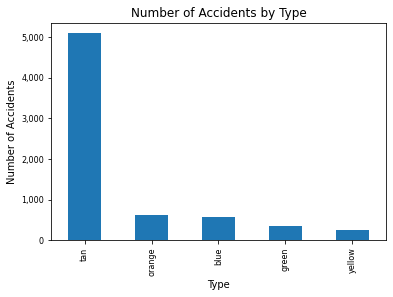

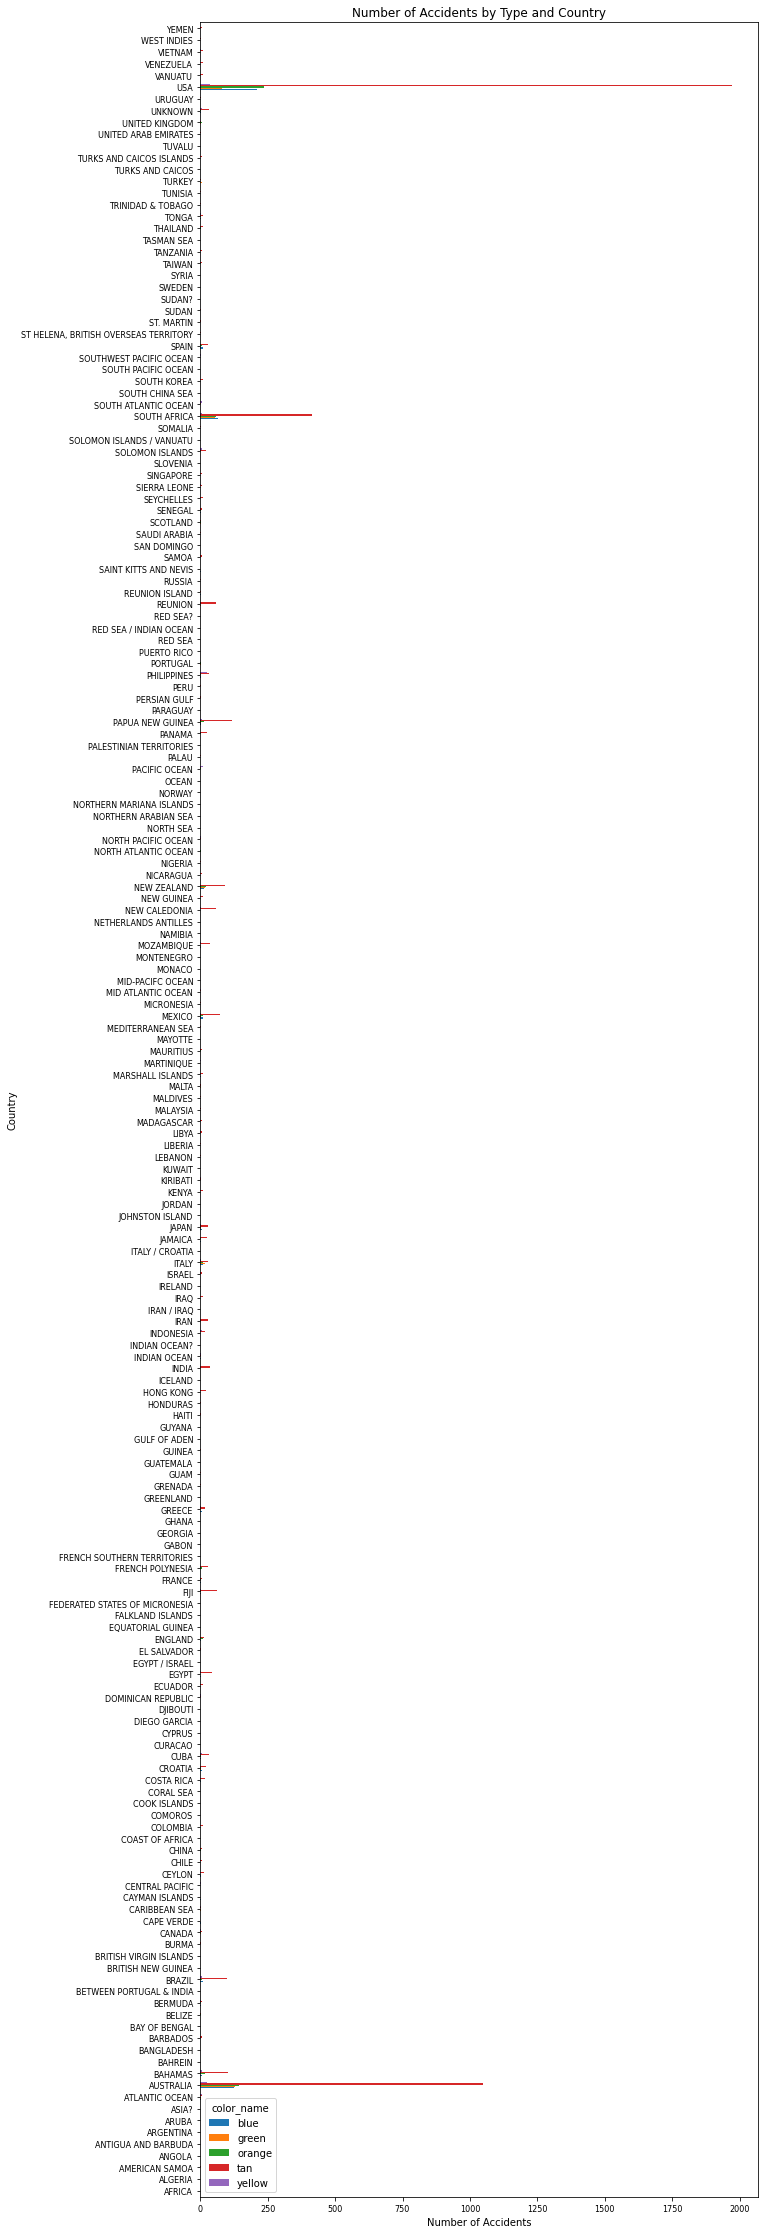

In [61]:
pivot_df = df.pivot_table(index='Country', columns='color_name', values='Date', aggfunc='count')

# create a stacked horizontal plot
ax = pivot_df.plot.barh(stacked=False,figsize = (10,40),fontsize = 8)

# set the title and axis labels
ax.set_title('Number of Accidents by Type and Country')
ax.set_xlabel('Number of Accidents')
ax.set_ylabel('Country')


# show the plot
plt.show()

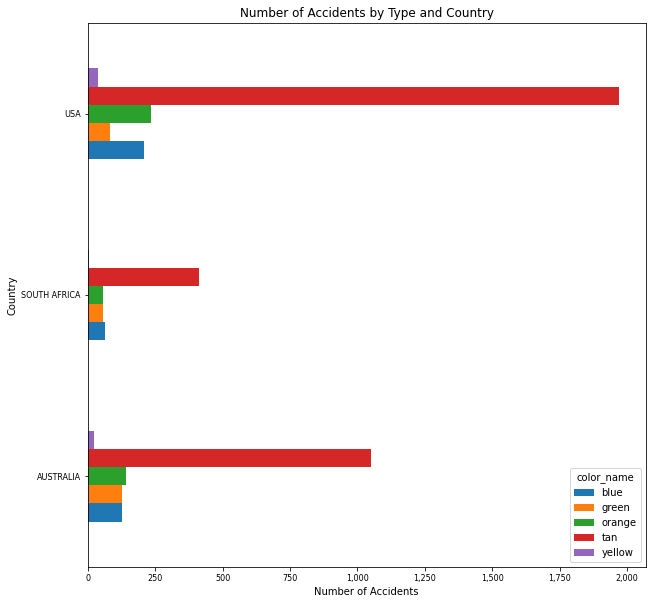

In [62]:
# List of countries you want to filter
countries_to_filter = ['SOUTH AFRICA', 'USA', 'AUSTRALIA']

# Filter the table for rows where the country is in the list of countries to filter
filtered_df = df[df['Country'].isin(countries_to_filter)]

pivot_df = filtered_df.pivot_table(index='Country', columns='color_name', values='Date', aggfunc='count')

# create a stacked horizontal plot
ax = pivot_df.plot.barh(stacked=False,figsize = (10,10),fontsize = 8)

ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# set the title and axis labels
ax.set_title('Number of Accidents by Type and Country')
ax.set_xlabel('Number of Accidents')
ax.set_ylabel('Country')


# show the plot
plt.show()



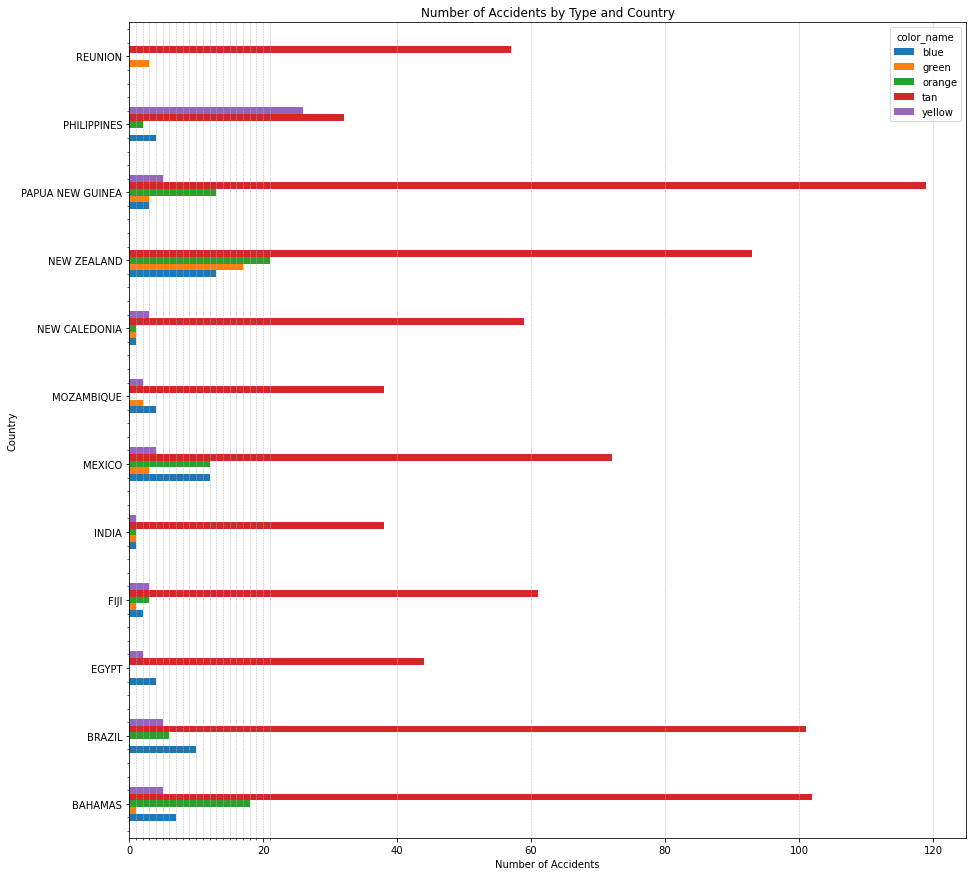

In [63]:
# List of countries you want to filter
countries_to_filter_2 = ['NEW ZEALAND','PAPUA NEW GUINEA','BAHAMAS' ,'REUNION','PHILIPPINES',
                         'FIJI','NEW CALEDONIA', 'MEXICO','BRAZIL','EGYPT','INDIA', 'MOZAMBIQUE']

# Filter the table for rows where the country is in the list of countries to filter
filtered_df = df[~df['Country'].isin(countries_to_filter)]
filtered_df = filtered_df[filtered_df['Country'].isin(countries_to_filter_2)]

pivot_df = filtered_df.pivot_table(index='Country', columns='color_name', values='Date', aggfunc='count')
# pivot_df = pivot_df.sum(axis=1).sort_values(ascending=True)

# create a stacked horizontal plot
ax = pivot_df.plot.barh(stacked=False,figsize = (15,15),fontsize = 10)

# set the title and axis labels
ax.set_title('Number of Accidents by Type and Country')
ax.set_xlabel('Number of Accidents')
ax.set_ylabel('Country')

plt.minorticks_on()

ax.set_xticks(range(1, 22), minor=True)

plt.grid(which='both', axis='x', linestyle='--', linewidth=0.5)

# show the plot
plt.show()

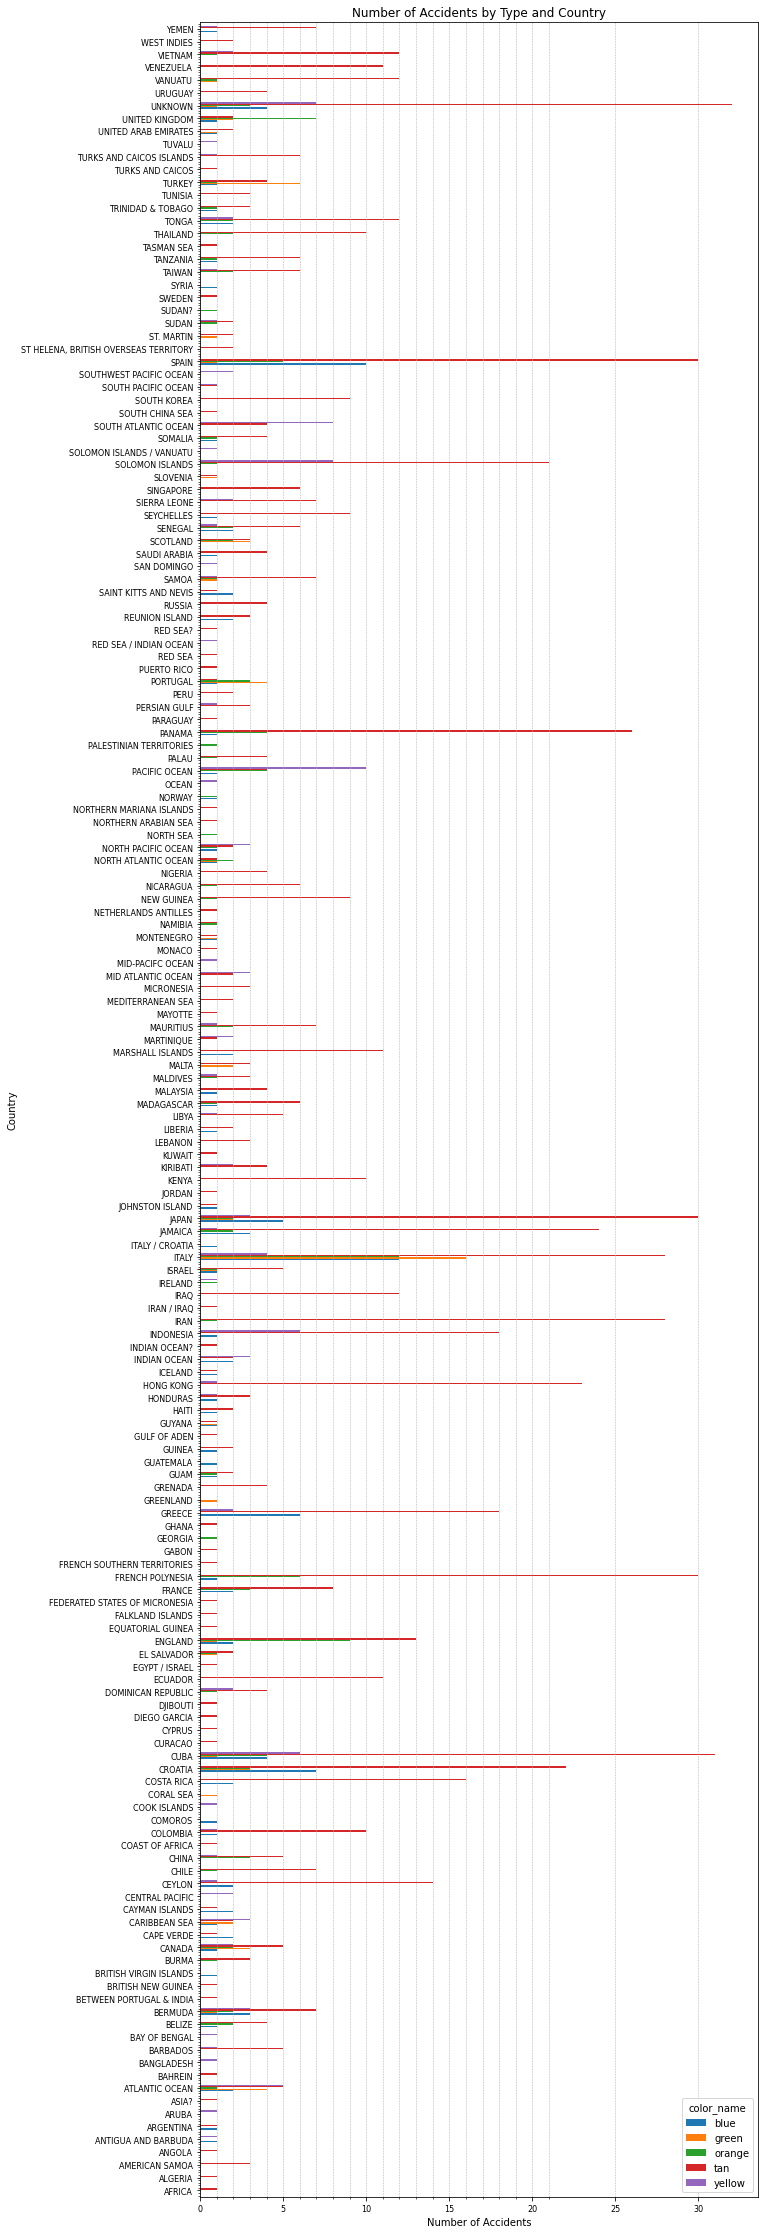

In [64]:
# Filter the table for rows where the country is in the list of countries to filter
filtered_df = df[~df['Country'].isin(countries_to_filter)]
filtered_df = filtered_df[~filtered_df['Country'].isin(countries_to_filter_2)]

pivot_df = filtered_df.pivot_table(index='Country', columns='color_name', values='Date', aggfunc='count')

# create a stacked horizontal plot
ax = pivot_df.plot.barh(stacked=False,figsize = (10,40),fontsize = 8)

# set the title and axis labels
ax.set_title('Number of Accidents by Type and Country')
ax.set_xlabel('Number of Accidents')
ax.set_ylabel('Country')

plt.minorticks_on()

ax.set_xticks(range(1, 22), minor=True)

plt.grid(which='both', axis='x', linestyle='--', linewidth=0.5)

# show the plot
plt.show()

## Mapa con distribución geográfica de los ataques
#### Podemos asignar coordenadas de latitud y longitud a cada ataque, para de esta manera graficarlos en un mapa y apreciar su distribución espacial a lo largo del globo.

[Mapa con cantidad de ataques por país](https://carlossanchezarg.github.io/tiburones_atack/)


---



In [68]:
import numpy as np
# Ref. https://developers.google.com/public-data/docs/canonical/countries_csv
paises_df = pd.read_csv('paises.csv')

def get_location_by_name(nombre, paises_df):
    # hacemos un query al dataset y al nombre le quitamos los espacios de adelante y atras usando la función strip()
    return paises_df.query('name.str.upper()==@nombre.strip().upper()')

def isNaN(num):
    return num != num


geo_data = []
for idx, row in df.iterrows():
    if isNaN(row.Country):
        print(row)
    if not isNaN(row.Country):
        pais_loc=get_location_by_name(row.Country, paises_df)
        if len(pais_loc)>0:
            geo_data.append({'pais':pais_loc.name.item(),'lat':pais_loc.lat.item(), 'lon':pais_loc.lon.item(), 'tipo':row.Type, 'lesiones':row.Injury, 'lugar':row.Location})
        else:
             geo_data.append({'pais':'','lat':np.nan, 'lon':np.nan, 'tipo':np.nan, 'lesiones':np.nan, 'lugar':np.nan})

In [72]:
!pip install folium
import folium
from folium.plugins import MarkerCluster

world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)

for c in geo_data[0:2500]:
    if c['pais']:
        pais = c['pais']
        lat = c['lat']
        long = c['lon']
        lugar = c['lugar']
        lesiones = c['lesiones']
        tipo_ataque = c['tipo']
        radius=1
        popup_text = """ <b> País : </b> {}<br>
                         <b>Lugar: </b> {}<br>
                         <b>  tipo de ataque: </b> {}<br>
                      """
        popup_text = popup_text.format(
                                   f'{pais}',
                                   f'{lugar}',
                                   f'({tipo_ataque})'
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)

world_map

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
